In [1]:
FNAME = 'easy'

# 00 Init

## Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting to use py files

In [3]:
import os

In [4]:
os.chdir('/content/drive/MyDrive/Minesweeper [RL]')

In [5]:
# check that os is in right directory
os.getcwd()

'/content/drive/MyDrive/Minesweeper [RL]'

In [6]:
! pip install codes

## Import py files

In [7]:
# baseline : Env, Agent
# from codes.environment.reward5 import *
from codes.environment.reward5 import *
from codes.agent.newVectorDQN import *
from codes.net.basicWithBias import *
from codes.trainer.validShutDown import *
# from codes.tester.basic import *
from codes.tester.validShutDown import *
# import codes.trainer.trainerWithValidShutDown as Trainer


## Import Libraries

# 01 Info

## level dictionary

In [8]:
level = {'easy' : {'map_size':(9,9), 'n_mines' : 10},
         'medium' : {'map_size':(16,16), 'n_mines':40},
         'expert' : {'map_size':(16,30), 'n_mines':99}}

## HYPER PARAMETERS

In [9]:
# Environment settings
MEM_SIZE = 50000
MEM_SIZE_MIN = 1000

# Learning settings
BATCH_SIZE = 64
LEARNING_RATE = 0.001
LEARN_DECAY = 0.25
LEARN_EPOCH = 50000
# LEARN_MIN = 0.001
DISCOUNT = 0.1

# Exploration settings
EPSILON = 0.95
EPSILON_DECAY = 0.999975
EPSILON_MIN = 0.01

# DQN settings
CONV_UNITS = 128
UPDATE_TARGET_EVERY = 5

# 02 Train, Valid

In [10]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'],
                     rewards={'win':1, 'lose':-1, 'progress':0.3, 'guess':0.3, 'no_progress' : -0.5},
                    dones={'win':True, 'lose':True, 'progress':False, 'guess':False, 'no_progress' : False})

tester_agent = Agent(env=env,
                    net=net,
                    MEM_SIZE=MEM_SIZE,
                    MEM_SIZE_MIN=MEM_SIZE_MIN,
                    BATCH_SIZE=BATCH_SIZE,
                    LEARNING_RATE=LEARNING_RATE,
                    LEARN_DECAY=LEARN_DECAY,
                    # LEARN_MIN=LEARN_MIN,
                    LEARN_EPOCH=LEARN_EPOCH,
                    DISCOUNT=DISCOUNT,
                    EPSILON=EPSILON,
                    EPSILON_DECAY=EPSILON_DECAY,
                    EPSILON_MIN=EPSILON_MIN,
                    UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

net = Net(input_dims=env.state.shape,
          n_actions=env.total_tiles,
          conv_units=CONV_UNITS)

NameError: name 'net' is not defined

## TRAIN_PARAMETERS

In [ ]:
EPISODES = 200000
PRINT_INTERVAL = 100
TRAIN_RENDER = False

TRAIN_TIMESTEPS = ['every timestep', 'every episodes']
TRAIN_TIMESTEP = TRAIN_TIMESTEPS[0]
VIUSAL_INTERVAL = 100

VALID_SAMPLE = 1000
VALID_INTERVAL = 10

## valid agent in train

In [ ]:
tester_agent = Agent(env=env,
                    net=net,
                    MEM_SIZE=MEM_SIZE,
                    MEM_SIZE_MIN=MEM_SIZE_MIN,
                    BATCH_SIZE=BATCH_SIZE,
                    LEARNING_RATE=LEARNING_RATE,
                    LEARN_DECAY=LEARN_DECAY,
                    # LEARN_MIN=LEARN_MIN,
                    LEARN_EPOCH=LEARN_EPOCH,
                    DISCOUNT=DISCOUNT,
                    EPSILON=EPSILON,
                    EPSILON_DECAY=EPSILON_DECAY,
                    EPSILON_MIN=EPSILON_MIN,
                    UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## main

- 차원에 따른 차이

In [12]:
with open(os.path.join('/content/drive/MyDrive/Minesweeper [RL]/models/3dim__0.1', "500000.pkl"), "rb") as f:
    dim3 = pickle.load(f) # wannabe_guess__0.3

In [118]:
with open(os.path.join('/content/drive/MyDrive/Minesweeper [RL]/models/wannabe_final', "500000.pkl"), "rb") as f:
    dim2 = pickle.load(f)

In [119]:
win_rates = []

for start in range(0, len(dim3.progress_list)-1000, 1000):
    win_rates.append(sum(dim3.wins_list[start:start+1000]) / 1000)

win_rates2 = []

for start in range(0, len(dim2.progress_list)-1000, 1000):
    win_rates2.append(sum(dim2.wins_list[start:start+1000]) / 1000)

- replay mem 수정

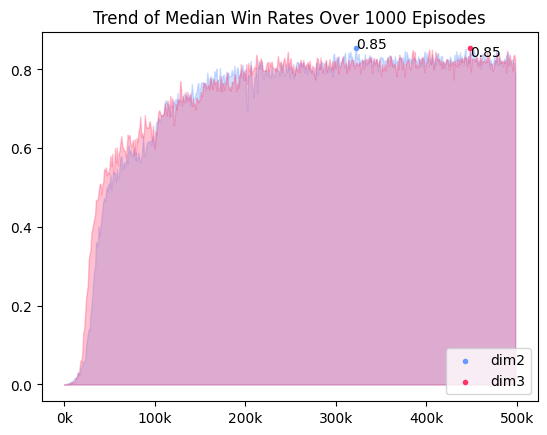

In [120]:
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x)}k'

# 포맷터 객체 생성
formatter = FuncFormatter(thousands_formatter)

fig, ax = plt.subplots()

# fill_between을 사용하여 범위 채우기
plt.fill_between(range(len(win_rates2)), min(win_rates2), win_rates2, alpha=0.3, color='#6699FF')
plt.fill_between(range(len(win_rates)), min(win_rates), win_rates, alpha=0.3, color='#FF3366')

# 최대값과 그 위치를 표시
max_index2 = np.argmax(win_rates2)
max_index = np.argmax(win_rates)

plt.scatter(max_index2, max(win_rates2), marker='.', color='#6699FF', label="dim2")
plt.scatter(max_index, max(win_rates), marker='.', color='#FF3366', label="dim3")

# annotate 사용
plt.annotate(f"{max(win_rates2):.2f}", (max_index2 + 0.5, max(win_rates2)))
plt.annotate(f"{max(win_rates):.2f}", (max_index + 0.5, max(win_rates) - 0.02))

ax.xaxis.set_major_formatter(formatter)
plt.title(f"Trend of Median Win Rates Over 1000 Episodes")
plt.legend(loc=4)
plt.show()

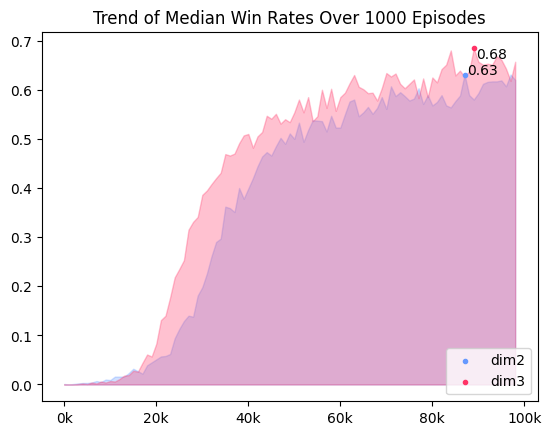

In [116]:
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x)}k'

# 포맷터 객체 생성
formatter = FuncFormatter(thousands_formatter)

fig, ax = plt.subplots()

# fill_between을 사용하여 범위 채우기
plt.fill_between(range(len(win_rates2)), min(win_rates2), win_rates2, alpha=0.3, color='#6699FF')
plt.fill_between(range(len(win_rates)), min(win_rates), win_rates, alpha=0.3, color='#FF3366')

# 최대값과 그 위치를 표시
max_index2 = np.argmax(win_rates2)
max_index = np.argmax(win_rates)

plt.scatter(max_index2, max(win_rates2), marker='.', color='#6699FF', label="dim2")
plt.scatter(max_index, max(win_rates), marker='.', color='#FF3366', label="dim3")

# annotate 사용
plt.annotate(f"{max(win_rates2):.2f}", (max_index2 + 0.5, max(win_rates2)))
plt.annotate(f"{max(win_rates):.2f}", (max_index + 0.5, max(win_rates) - 0.02))

ax.xaxis.set_major_formatter(formatter)
plt.title(f"Trend of Median Win Rates Over 1000 Episodes")
plt.legend(loc=4)
plt.show()

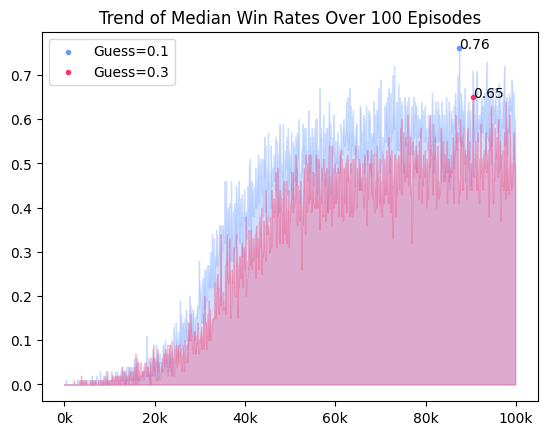

In [16]:
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x/10)}k'

# 포맷터 객체 생성
formatter = FuncFormatter(thousands_formatter)

fig, ax = plt.subplots()

# fill_between을 사용하여 범위 채우기
plt.fill_between(range(len(win_rates2)), min(win_rates2), win_rates2, alpha=0.3, color='#6699FF')
plt.fill_between(range(len(win_rates)), min(win_rates), win_rates, alpha=0.3, color='#FF3366')

# 최대값과 그 위치를 표시
max_index2 = np.argmax(win_rates2)
max_index = np.argmax(win_rates)

plt.scatter(max_index2, max(win_rates2), marker='.', color='#6699FF', label="Guess=0.1")
plt.scatter(max_index, max(win_rates), marker='.', color='#FF3366', label="Guess=0.3")

# annotate 사용
plt.annotate(f"{max(win_rates2):.2f}", (max_index2 + 0.5, max(win_rates2)))
plt.annotate(f"{max(win_rates):.2f}", (max_index + 0.5, max(win_rates)))

ax.xaxis.set_major_formatter(formatter)
plt.title(f"Trend of Median Win Rates Over 100 Episodes")
plt.legend()
plt.show()

## Guess에 따른 차이

In [13]:
with open(os.path.join('/content/drive/MyDrive/Minesweeper [RL]/models/wannabe_guess__0.3', "500000.pkl"), "rb") as f:
    dim3 = pickle.load(f)

In [12]:
with open(os.path.join('/content/drive/MyDrive/Minesweeper [RL]/models/wannabe_final', "500000.pkl"), "rb") as f:
    dim2 = pickle.load(f)

In [14]:
win_rates = []

for start in range(0, len(dim3.progress_list)-1000, 1000):
    win_rates.append(sum(dim3.wins_list[start:start+1000]) / 1000)

win_rates2 = []

for start in range(0, len(dim2.progress_list)-1000, 1000):
    win_rates2.append(sum(dim2.wins_list[start:start+1000]) / 1000)

- replay mem 수정

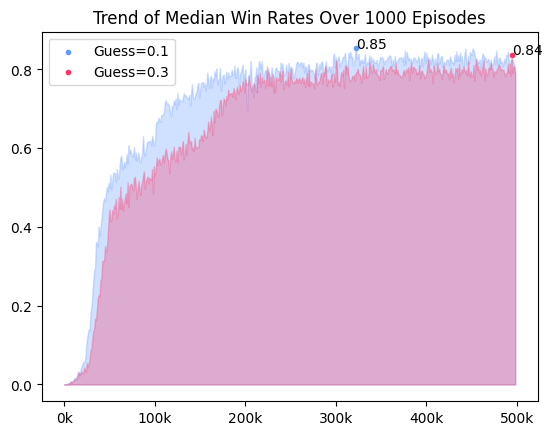

In [16]:
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x)}k'

# 포맷터 객체 생성
formatter = FuncFormatter(thousands_formatter)

fig, ax = plt.subplots()

# fill_between을 사용하여 범위 채우기
plt.fill_between(range(len(win_rates2)), min(win_rates2), win_rates2, alpha=0.3, color='#6699FF')
plt.fill_between(range(len(win_rates)), min(win_rates), win_rates, alpha=0.3, color='#FF3366')

# 최대값과 그 위치를 표시
max_index2 = np.argmax(win_rates2)
max_index = np.argmax(win_rates)

plt.scatter(max_index2, max(win_rates2), marker='.', color='#6699FF', label="Guess=0.1")
plt.scatter(max_index, max(win_rates), marker='.', color='#FF3366', label="Guess=0.3")

# annotate 사용
plt.annotate(f"{max(win_rates2):.2f}", (max_index2 + 0.5, max(win_rates2)))
plt.annotate(f"{max(win_rates):.2f}", (max_index + 0.5, max(win_rates)))

ax.xaxis.set_major_formatter(formatter)
plt.title(f"Trend of Median Win Rates Over 1000 Episodes")
plt.legend()
plt.show()

In [13]:
with open(os.path.join('/content/drive/MyDrive/Minesweeper [RL]/models/wannabe_final', "300000.pkl"), "rb") as f:
    dim2 = pickle.load(f)

In [14]:
with open(os.path.join('/content/drive/MyDrive/Minesweeper [RL]/models/biggerNegativeReward_withSmallGuess', "300000.pkl"), "rb") as f:
    dim3 = pickle.load(f)

In [ ]:
win_rates = []

for start in range(0, len(dim3.progress_list)-100, 100):
    win_rates.append(sum(dim3.wins_list[start:start+100]) / 100)

win_rates2 = []

for start in range(0, len(dim2.progress_list)-100, 100):
    win_rates2.append(sum(dim2.wins_list[start:start+100]) / 100)

- replay mem 수정

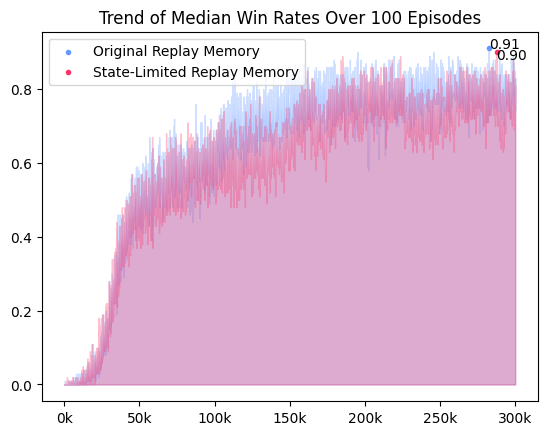

In [38]:
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x/10)}k'

# 포맷터 객체 생성
formatter = FuncFormatter(thousands_formatter)

fig, ax = plt.subplots()

# fill_between을 사용하여 범위 채우기
plt.fill_between(range(len(win_rates2)), min(win_rates2), win_rates2, alpha=0.3, color='#6699FF')
plt.fill_between(range(len(win_rates)), min(win_rates), win_rates, alpha=0.3, color='#FF3366')

# 최대값과 그 위치를 표시
max_index2 = np.argmax(win_rates2)
max_index = np.argmax(win_rates)

plt.scatter(max_index2, max(win_rates2), marker='.', color='#6699FF', label="Original Replay Memory")
plt.scatter(max_index, max(win_rates), marker='.', color='#FF3366', label="State-Limited Replay Memory")

# annotate 사용
plt.annotate(f"{max(win_rates2):.2f}", (max_index2 + 0.5, max(win_rates2)))
plt.annotate(f"{max(win_rates):.2f}", (max_index + 0.5, max(win_rates) - 0.02))

ax.xaxis.set_major_formatter(formatter)
plt.title(f"Trend of Median Win Rates Over 100 Episodes")
plt.legend()
plt.show()

In [15]:
win_rates = []

for start in range(0, len(dim3.progress_list)-1000, 1000):
    win_rates.append(sum(dim3.wins_list[start:start+1000]) / 1000)

win_rates2 = []

for start in range(0, len(dim2.progress_list)-1000, 1000):
    win_rates2.append(sum(dim2.wins_list[start:start+1000]) / 1000)

- replay mem 수정

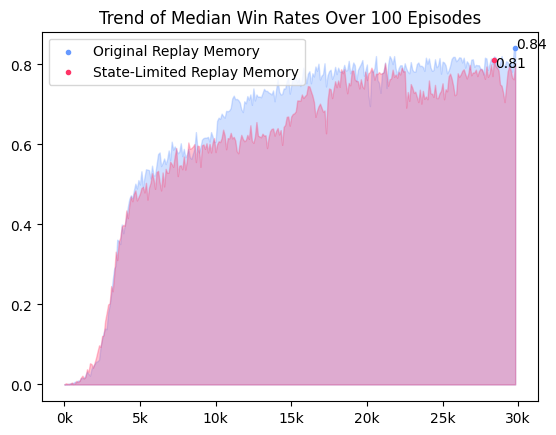

In [17]:
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x/10)}k'

# 포맷터 객체 생성
formatter = FuncFormatter(thousands_formatter)

fig, ax = plt.subplots()

# fill_between을 사용하여 범위 채우기
plt.fill_between(range(len(win_rates2)), min(win_rates2), win_rates2, alpha=0.3, color='#6699FF')
plt.fill_between(range(len(win_rates)), min(win_rates), win_rates, alpha=0.3, color='#FF3366')

# 최대값과 그 위치를 표시
max_index2 = np.argmax(win_rates2)
max_index = np.argmax(win_rates)

plt.scatter(max_index2, max(win_rates2), marker='.', color='#6699FF', label="Original Replay Memory")
plt.scatter(max_index, max(win_rates), marker='.', color='#FF3366', label="State-Limited Replay Memory")

# annotate 사용
plt.annotate(f"{max(win_rates2):.2f}", (max_index2 + 0.5, max(win_rates2)))
plt.annotate(f"{max(win_rates):.2f}", (max_index + 0.5, max(win_rates) - 0.02))

ax.xaxis.set_major_formatter(formatter)
plt.title(f"Trend of Median Win Rates Over 100 Episodes")
plt.legend()
plt.show()

## 같은 애 print interval 다르게

In [15]:
with open(os.path.join('/content/drive/MyDrive/Minesweeper [RL]/models/wannabe_final', "300000.pkl"), "rb") as f:
    dim2 = pickle.load(f)

In [18]:
_1000 = []

for start in range(0, len(dim2.progress_list)-1000, 1000):
    _1000.append(sum(dim2.wins_list[start:start+1000]) / 1000)

_100 = []

for start in range(0, len(dim2.progress_list)-100, 100):
    _100.append(sum(dim2.wins_list[start:start+100]) / 100)

- replay mem 수정

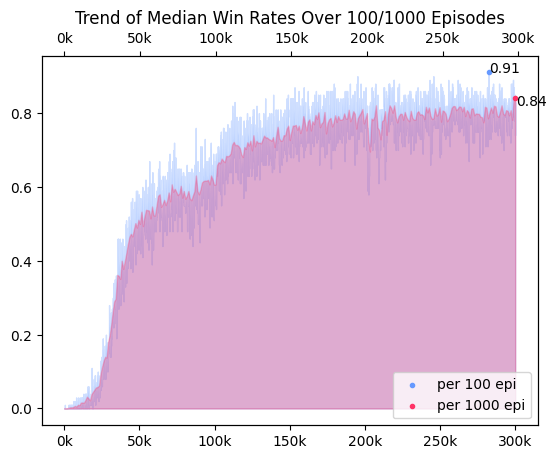

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# 데이터 예시
win_rates = _1000
win_rates2 = _100

# 포맷터 정의
def formatter_100(x, pos):
    return f'{int(x/10)}k'  # 수정: 나누기 10을 제거

def formatter_1000(x, pos):
    return f'{int(x)}k'

# 포맷터 객체 생성
formatter_100 = FuncFormatter(formatter_100)
formatter_1000 = FuncFormatter(formatter_1000)

fig, ax = plt.subplots()
ax2 = ax.twiny()

# ax를 사용하여 첫 번째 데이터 세트 시각화
line1 = ax.fill_between(range(len(win_rates2)), min(win_rates2), win_rates2, alpha=0.3, color='#6699FF')
scatter1 = ax.scatter(np.argmax(win_rates2), max(win_rates2), marker='.', color='#6699FF', label="per 100 epi")
ax.annotate(f"{max(win_rates2):.2f}", (np.argmax(win_rates2) + 0.5, max(win_rates2)))

# ax2를 사용하여 두 번째 데이터 세트 시각화
line2 = ax2.fill_between(range(len(win_rates)), min(win_rates), win_rates, alpha=0.3, color='#FF3366')
scatter2 = ax2.scatter(np.argmax(win_rates), max(win_rates), marker='.', color='#FF3366', label="per 1000 epi")
ax2.annotate(f"{max(win_rates):.2f}", (np.argmax(win_rates) + 0.5, max(win_rates) - 0.02))

# 포맷터 설정
ax.xaxis.set_major_formatter(formatter_100)
ax2.xaxis.set_major_formatter(formatter_1000)

# 범례 핸들과 레이블 모으기
handles, labels = [], []
for ax in [ax, ax2]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)

# 범례 설정
plt.legend(handles, labels, loc=4)

# 타이틀 설정
plt.title("Trend of Median Win Rates Over 100/1000 Episodes")

# 그래프 표시
plt.show()

In [61]:
pd.DataFrame([_100,_1000]).T.to_csv("100_1000_data.csv")

In [64]:
sep_parms = round(len(_100) / 6)
target = _100

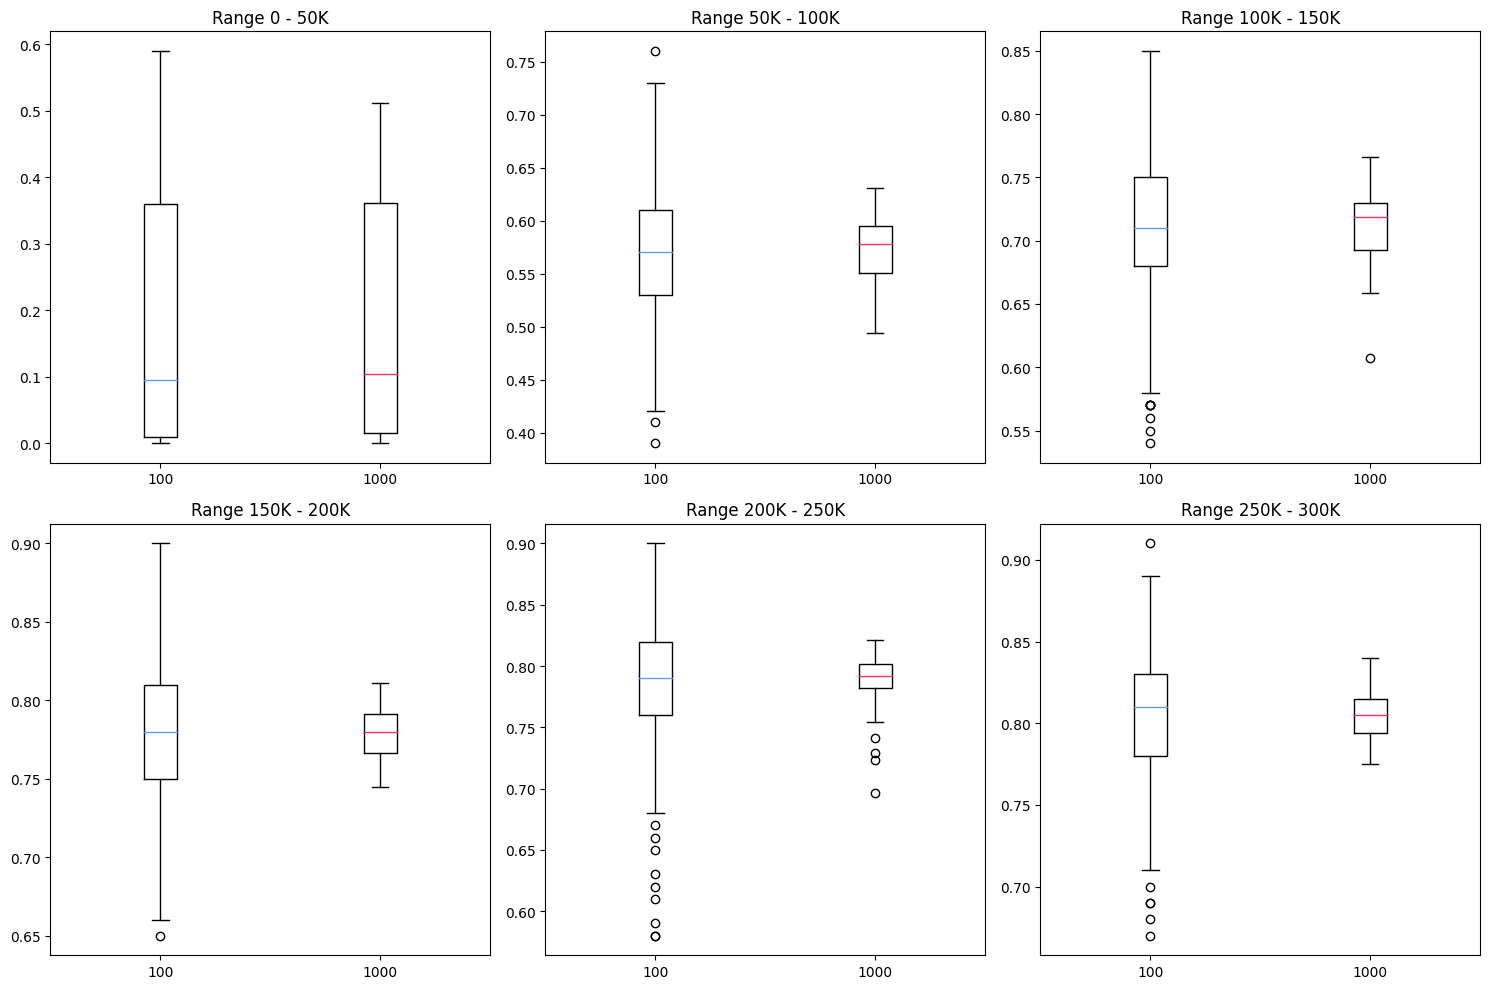

In [67]:
sep_parms2 = round(len(_1000) / 6)
target2 = _1000

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Function to customize boxplot
def customize_boxplot(bp, median_colors):
    for median, color in zip(bp['medians'], median_colors):
        median.set_color(color)

ranges = ['0 - 50K', '50K - 100K', '100K - 150K', '150K - 200K', '200K - 250K', '250K - 300K']

for i in range(3):
    bp = ax[0, i].boxplot([target[i*sep_parms:(i+1)*sep_parms], target2[i*sep_parms2:(i+1)*sep_parms2]], positions=[1, 2])
    customize_boxplot(bp, ['#6699FF', '#FF3366'])
    ax[0, i].set_xticks([1, 2])
    ax[0, i].set_xticklabels(['100', '1000'])
    ax[0, i].set_xlim(0.5, 2.5)
    ax[0, i].set_title(f'Range {ranges[i]}')

for i in range(3):
    bp = ax[1, i].boxplot([target[(i+3)*sep_parms:(i+4)*sep_parms], target2[(i+3)*sep_parms2:(i+4)*sep_parms2]], positions=[1, 2])
    customize_boxplot(bp, ['#6699FF', '#FF3366'])
    ax[1, i].set_xticks([1, 2])
    ax[1, i].set_xticklabels(['100', '1000'])
    ax[1, i].set_xlim(0.5, 2.5)
    ax[1, i].set_title(f'Range {ranges[i+3]}')

plt.tight_layout()
plt.show()

In [17]:
trainer = dim3

In [24]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'],
                     rewards={'win':1, 'lose':-1, 'progress':0.3, 'guess':0.3, 'no_progress' : -0.5},
                    dones={'win':True, 'lose':True, 'progress':False, 'guess':False, 'no_progress' : False},
                     dim2=True)

net = Net(input_dims=env.state.shape,
          n_actions=env.total_tiles,
          conv_units=CONV_UNITS,
          in_channels=env.n_channel)

tester_agent = Agent(env=env,
                    net=net,
                    MEM_SIZE=MEM_SIZE,
                    MEM_SIZE_MIN=MEM_SIZE_MIN,
                    BATCH_SIZE=BATCH_SIZE,
                    LEARNING_RATE=LEARNING_RATE,
                    LEARN_DECAY=LEARN_DECAY,
                    # LEARN_MIN=LEARN_MIN,
                    LEARN_EPOCH=LEARN_EPOCH,
                    DISCOUNT=DISCOUNT,
                    EPSILON=EPSILON,
                    EPSILON_DECAY=EPSILON_DECAY,
                    EPSILON_MIN=EPSILON_MIN,
                    UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

In [31]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_valid'])

Test Started.
Test [n: 1000], Median progress: 17.50, Median reward: 5.80, Win rate : 0.791


In [30]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_train'])

Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.80, Win rate : 0.8


In [27]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['final_model'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.80, Win rate : 0.807


In [29]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_successed'])

Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.80, Win rate : 0.801


In [ ]:
win_rate_1000 = []

for _ in range(100):
    win_rate_1000.append(tester.test_model(1000, trainer.save_point['final_model']))
    # state3 : guess 0.1 : best_model_valid
    # state2 : guess 0.1 : best_model_train
    # state2 : guess 0.3 : final_model

Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.80, Win rate : 0.803
Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.80, Win rate : 0.799
Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.80, Win rate : 0.788
Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.60, Win rate : 0.795
Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.80, Win rate : 0.763
Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.80, Win rate : 0.808
Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.80, Win rate : 0.8
Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.80, Win rate : 0.795
Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.80, Win rate : 0.779
Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.80, Win rate : 0.799
Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.80, Win rat

In [21]:
len(win_rate_1000)

100

In [24]:
pd.DataFrame(win_rate_1000).describe()

,0
count,100.000000
mean,0.834280
std,0.011877
min,0.812000
25%,0.824750
50%,0.834000
75%,0.842500
max,0.859000


In [25]:
win_rate_100 = []

for _ in range(1000):
    win_rate_100.append(tester.test_model(100, trainer.save_point['best_model_valid']))

Test Started.
Test [n: 100], Median progress: 19.00, Median reward: 6.40, Win rate : 0.88
Test Started.
Test [n: 100], Median progress: 17.00, Median reward: 5.80, Win rate : 0.88
Test Started.
Test [n: 100], Median progress: 18.00, Median reward: 6.10, Win rate : 0.84
Test Started.
Test [n: 100], Median progress: 19.50, Median reward: 6.40, Win rate : 0.82
Test Started.
Test [n: 100], Median progress: 19.00, Median reward: 6.10, Win rate : 0.89
Test Started.
Test [n: 100], Median progress: 19.00, Median reward: 6.40, Win rate : 0.86
Test Started.
Test [n: 100], Median progress: 18.00, Median reward: 6.10, Win rate : 0.8
Test Started.
Test [n: 100], Median progress: 17.00, Median reward: 5.80, Win rate : 0.83
Test Started.
Test [n: 100], Median progress: 18.00, Median reward: 6.10, Win rate : 0.87
Test Started.
Test [n: 100], Median progress: 17.00, Median reward: 5.80, Win rate : 0.82
Test Started.
Test [n: 100], Median progress: 18.00, Median reward: 5.95, Win rate : 0.88
Test Starte

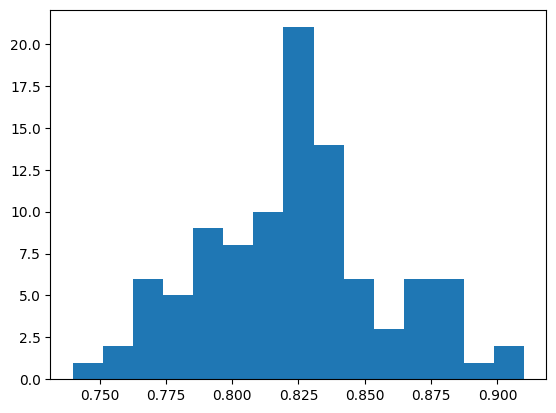

In [31]:
plt.hist(random.sample(win_rate_100, 100), bins=15)
plt.show()

In [26]:
pd.DataFrame(win_rate_100).describe()

,0
count,1000.000000
mean,0.836470
std,0.036143
min,0.720000
25%,0.810000
50%,0.840000
75%,0.860000
max,0.930000


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

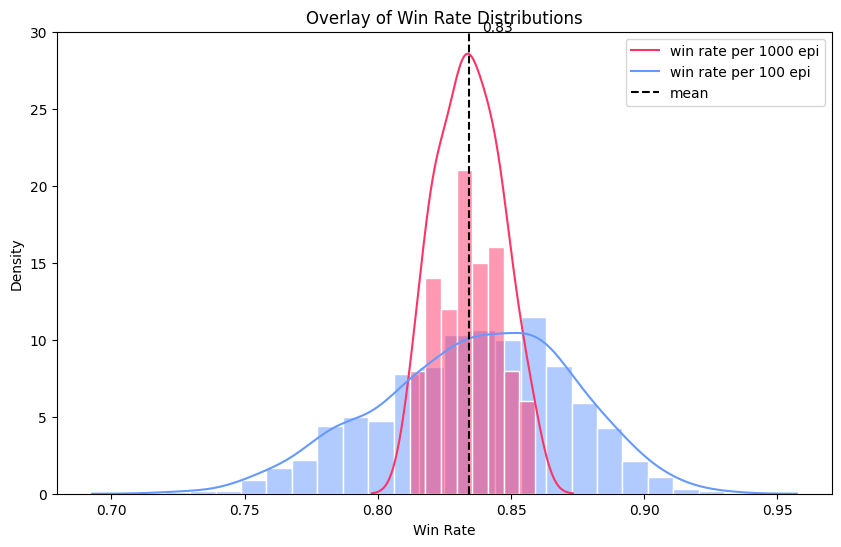

In [27]:
df_1000 = pd.DataFrame(win_rate_1000, columns=['win_rate'])
df_100 = pd.DataFrame(win_rate_100, columns=['win_rate'])

# Create the overlay plot
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_1000, x='win_rate', color='#FF3366', label='win rate per 1000 epi')
sns.kdeplot(data=df_100, x='win_rate', color='#6699FF', label='win rate per 100 epi')

sns.histplot(data=df_100, x='win_rate', color='#6699FF', stat="percent", alpha=0.5, edgecolor="white")
sns.histplot(data=df_1000, x='win_rate', color='#FF3366', stat="percent", alpha=0.5, edgecolor="white")

plt.axvline(np.mean(df_1000), color='black', linestyle='--', label='mean')
plt.annotate(f"{np.mean(df_1000):.2f}", (np.mean(df_1000)+ 0.005, 30))

plt.legend()
plt.title('Overlay of Win Rate Distributions')
plt.xlabel('Win Rate')
plt.ylabel('Density')

plt.show()

In [82]:
pd.DataFrame([win_rate_1000, win_rate_100]).T.to_csv("test_simulation.csv")